In [21]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pluck = lambda dict, *args: (dict[arg] for arg in args)

def peptide(funcs, t, params_dict):
    cp1, cp2, x, y = funcs
    k01, k21, k12, m, a, b, G, h = pluck(params_dict, 'k01', 'k21', 'k12', 'm', 'a', 'b', 'G', 'h')
    
    f1 = -(k01 + k21) * cp1 + k12 * cp2 + m * x
    f2 = k21 * cp1 - k12 * cp2
    f3 = -m * x + y
    f4 = -a * (y - b * (G - h))
    
    dydt = [f1, f2, f3, f4]
    return dydt

def sens_value(sol, par, delta_x, delta_y):
    if sol != 0 and delta_x != 0:
        return par / sol * (delta_y) / (2 * delta_x)
    else: 
        return float('Inf')

def sensitivity(funcs, y0, t, params, delta):
    sol = odeint(funcs, y0, t, args=(params,))
    sens_list = {}
    for key, value in params.iteritems():
        params_delta_p = params.copy()
        params_delta_m = params.copy()
        params_delta_p[key] = value + delta
        params_delta_m[key] = value - delta
        
        sol_delta_p = odeint(funcs, y0, t, args=(params_delta_p,))
        sol_delta_m = odeint(funcs, y0, t, args=(params_delta_m,))
        
        sens_param = 0.0
        for i in range(len(y0)):
            def sens_sum(k):
                return sens_value(sol[k][i], value, delta, sol_delta_p[k][i] - sol_delta_m[k][i]) ** 2      
            sens_param += sum([sens_sum(k) for k in range(len(sol)) if sol[k][i] != 0])
        
        sens_list[key] = sens_param
    return sens_list

def plot(sol):
    plt.plot(t, sol[:, 0], 'b', label='cp1(t)')
    plt.plot(t, sol[:, 1], 'g', label='cp2(t)')
    plt.plot(t, sol[:, 2], 'r', label='x(t)')
    plt.plot(t, sol[:, 3], 'y', label='y(t)')
    plt.legend(loc='best')
    plt.xlabel('t')
    plt.grid()
    plt.show()

Sensitivity of parameters:
a = 2716.84712619
k01 = 15.3613597795
b = 3493.25972797
G = 3865.74313634
k12 = 4.65470448718
h = 9.4338049202
k21 = 902.704432998
m = 1071.14558571
['G', 'b', 'a', 'm', 'k21', 'k01', 'h', 'k12']
[3865.7431363397127, 3493.2597279727524, 2716.8471261867453, 1071.145585713741, 902.70443299833039, 15.361359779453723, 9.4338049201979786, 4.6547044871804779]


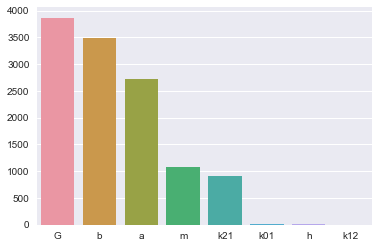

In [23]:
k01 = 0.064
k21 = 0.054
k12 = 0.056
m = 0.57
a = 0.065
b = 11.32
G = 100
h = 4.94
delta = 0.00001
y0 = [0, 0, 10, 0]
t = np.linspace(0, 10, 1001)

params_dict = {
    'k01': k01,
    'k21': k21,
    'k12': k12,
    'm': m,
    'a': a,
    'b': b,
    'G': G,
    'h': h
}

#sol = odeint(peptide, y0, t, args=(params_dict,))
#plot(sol)


result = sensitivity(peptide, y0, t, params_dict, delta=0.0000001)
print "Sensitivity of parameters:"
for key,value in result.iteritems():
    print key, "=", value
    
sorted_res = sorted(result.items(), key=lambda x: x[1], reverse=True)
keys = [x[0] for x in sorted_res]
values = [x[1] for x in sorted_res]
pl = sns.barplot(x=keys, y=values)
plt.savefig('1.png')